In [1]:
pip install reverse_geocoder

Defaulting to user installation because normal site-packages is not writeable
     ---------------------------------------- 2.2/2.2 MB 832.3 kB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for reverse_geocoder: filename=reverse_geocoder-1.5.1-py3-none-any.whl size=2268077 sha256=aa988ddc981ae5020f3fdeb246cd0b0c2382650a99e8b91dc3489340c6804ff3
  Stored in directory: c:\users\user\appdata\local\pip\cache\wheels\1c\07\35\8bc99c070537c835a0696e47609f6270f174cb70b86b65c7d8
Successfully built reverse_geocoder
Note: you may need to restart the kernel to use updated packages.


In [1]:
#Libraries 
import pandas as pd
import reverse_geocoder as rg
import warnings
warnings.filterwarnings("ignore")

In [24]:
#Reading file
df = pd.read_csv(r'C:\Users\user\downloads\PK_eq.csv')
df.head()

,Year,Month,Day,Time,Lat,Lon,Depth,Mag,Region,Timestamp
0,2022,4,11,1:41:41,33.2832,70.5607,41.2,4.8,PAKISTAN,1649641301
1,2022,3,18,2:54:11,30.1460,72.5955,15.3,4.2,PAKISTAN,1647572051
2,2022,7,31,13:42:13,25.1527,63.5489,10.0,5.6,SOUTHWESTERN PAKISTAN,1659274933
3,2022,5,6,6:21:18,26.9542,66.2725,10.0,5.2,PAKISTAN,1651818078
4,2022,7,31,13:52:16,25.1473,63.4376,10.0,5.1,SOUTHWESTERN PAKISTAN,1659275536


# Basic Preprocesssing

In [25]:
# Checking for null values
df.isna().sum()

Year         0
Month        0
Day          0
Time         0
Lat          0
Lon          0
Depth        0
Mag          0
Region       0
Timestamp    0
dtype: int64

In [ ]:
#Dropping columns not important for analysis
df.drop(['Magnitude Type', 'Magnitude Error', 'Magnitude Seismic Stations', 'Azimuthal Gap', 'Horizontal Distance',
         'Horizontal Error', 'Root Mean Square','Depth Error', 'Depth Seismic Stations', 'Source', 'Location Source', 
         'Magnitude Source', 'Status'], inplace = True, axis =1)

In [27]:
#Description of the dataset
df.describe()

,Year,Month,Day,Lat,Lon,Depth,Mag,Timestamp
count,4546.000000,4546.000000,4546.000000,4546.000000,4546.000000,4546.000000,4546.000000,4.546000e+03
mean,2002.873295,7.116146,15.574131,31.482930,70.346297,25.202574,3.996854,1.054725e+09
std,10.029188,3.559851,8.758331,3.077798,3.283553,28.849384,0.625583,3.178132e+08
min,1970.000000,1.000000,1.000000,23.498400,61.091100,0.000000,2.100000,2.471259e+07
25%,1998.000000,4.000000,8.000000,29.610800,67.760400,10.000000,3.600000,8.969340e+08
50%,2005.000000,8.000000,15.000000,31.469400,70.619850,21.000000,3.900000,1.129399e+09
75%,2008.000000,10.000000,24.000000,34.581300,73.253425,33.000000,4.400000,1.226745e+09
max,2022.000000,12.000000,31.000000,35.123900,75.373700,831.200000,7.800000,1.666717e+09


In [20]:
#Checking for different categorical values of 'Type' column
df['Mag'].value_counts()

3.6    340
3.7    337
3.8    326
3.5    316
3.9    264
4.0    240
3.4    230
4.1    218
4.4    210
4.2    203
4.5    203
4.3    203
4.7    186
4.6    182
3.3    162
3.2    125
4.8    123
4.9    114
3.1     80
5.0     74
3.0     56
5.2     45
5.1     43
2.8     31
2.9     30
5.3     30
2.7     26
5.4     25
2.5     19
2.6     17
5.6     17
5.5     15
5.7     12
2.4     10
5.8      8
5.9      6
2.3      3
6.4      3
6.0      3
6.3      2
2.1      1
6.2      1
7.0      1
7.8      1
7.6      1
2.2      1
7.2      1
6.8      1
6.1      1
Name: Mag, dtype: int64

In [33]:
#Deleting all other entries except 'Earthquake'
filt = (df['Region'] == 'EASTERN KASHMIR')
df = df[filt]
df.drop(['Region'], axis =1, inplace = True)
df.reset_index(drop = True, inplace =True)

In [34]:
df.to_csv(r'C:\Users\user\downloads\EK_eq.csv')

# Reverse Geocoding

In [35]:
#Python3 program for reverse geocoding
def convert_to_country(df):
  for index, row in df.iterrows():
      coordinates = (row['Lat'], row['Lon'])
      result = rg.search(coordinates)  
      df.at[index, 'Pakistan'] = result[0]['PK'] # Using only cc (Country code) 
  return df   

In [ ]:
df2 = pd.read_csv('/content/Country_codes.csv')
df2.head()

,Name,Code
0,Afghanistan,AF
1,Åland Islands,AX
2,Albania,AL
3,Algeria,DZ
4,American Samoa,AS


In [ ]:
df = pd.merge(df, df2, left_on ="Country", right_on = "Code")
df.drop(['Code'], axis =1, inplace = True)
#df.drop(['Name_x'], axis =1, inplace = True)

In [ ]:
df.to_csv('Locations.csv', index = False)

In [ ]:
df = pd.read_csv('/content/Locations.csv')
df.drop(['Name_x'], axis =1, inplace = True)
df.rename(columns = {'Name_y': 'Name'}, inplace = True)
df.head()

,Date,Time,Latitude,Longitude,Depth,Magnitude,ID,Country,Name
0,01/02/1965,13:44:18,19.246,145.616,131.6,6.0,ISCGEM860706,MP,Northern Mariana Islands
1,02/17/1965,18:23:57,21.527,143.081,340.0,5.6,ISCGEM860296,MP,Northern Mariana Islands
2,04/25/1965,01:00:15,24.409,142.776,30.0,6.0,ISCGEM858003,MP,Northern Mariana Islands
3,02/10/1966,14:21:13,20.711,146.163,45.7,6.5,ISCGEM850077,MP,Northern Mariana Islands
4,03/29/1966,02:17:40,23.869,142.248,80.0,6.0,ISCGEM849682,MP,Northern Mariana Islands


**1. PLOTTING EARTHQUAKE MAGNITUDE**

In [36]:
import plotly.figure_factory as ff
fig = ff.create_distplot([df['Mag']], ['Earthquake Magnitude'])
fig.show()

**2. GETTING MONTH COLUMN USING DATE AND TIME**

In [ ]:
# These rows didn't have date and time in correct format
df.drop([5956, 12450, 13192], axis =0, inplace = True)
df.reset_index(drop = True, inplace =True)

In [56]:
df.head()

,Year,Month,Day,Time,Lat,Lon,Depth,Mag,Timestamp
0,2015,2,24,4:02:21,33.3949,75.0972,35.0,3.5,1424750541
1,2014,8,27,3:20:17,34.7169,75.1838,0.0,3.9,1409109617
2,2013,9,5,18:11:29,33.2323,75.3594,22.0,4.5,1378404689
3,2012,8,2,18:00:27,33.6959,75.2808,22.0,4.1,1343930427
4,2011,9,24,15:21:34,34.0753,75.1808,40.0,4.2,1316877694


In [ ]:
# Python program to create MONTH column
import datetime
def month(df):
    for index, row in df.iterrows():
        datem = datetime.datetime.strptime(row['DateTime'], "%m/%d/%Y %H:%M:%S")
        df.at[index, 'Month'] = datem.strftime("%B")
    return df

In [ ]:
df= month(df)
df.tail()

,Date,Time,Latitude,Longitude,Depth,Magnitude,ID,Country,Name,DateTime,Month
23224,01/12/2010,22:12:05,18.452,-72.513,10.0,5.7,USP000H60N,HT,Haiti,01/12/2010 22:12:05,January
23225,01/13/2010,01:32:44,18.420,-72.861,10.0,5.6,USP000H61B,HT,Haiti,01/13/2010 01:32:44,January
23226,01/13/2010,01:36:31,18.404,-72.826,10.0,5.6,USP000H61C,HT,Haiti,01/13/2010 01:36:31,January
23227,01/13/2010,05:02:57,18.367,-72.903,10.0,5.8,USP000H61Z,HT,Haiti,01/13/2010 05:02:57,January
23228,01/20/2010,11:03:43,18.423,-72.823,10.5,5.9,USP000H6D2,HT,Haiti,01/20/2010 11:03:43,January


In [41]:
import plotly.express as px
fig = px.histogram(df, x="Year")
fig.show()

**4. IS THERE INCREASE IN HIGH MAGNITUDE EARTHQUAKES AS WELL?**

In [60]:
df_low = df.query('Mag < 7')
df_high = df.query('Mag >= 7 and Mag <7.9')
df_severe = df.query('Mag >= 7.9')

In [70]:
# importing package
import matplotlib.pyplot as plt

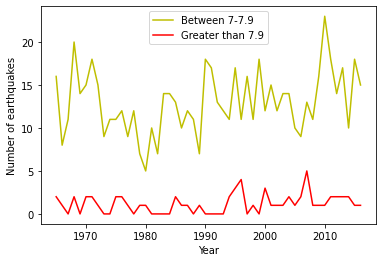

In [ ]:
# Plotting high and severe magnitude earthquakes
plt.plot(Year, X2, color ='y')
plt.plot(Year, X3, color = 'r')
plt.xlabel('Year')
plt.ylabel('Number of earthquakes')
plt.legend(['Between 7-7.9','Greater than 7.9'])

**5. WHERE DO HIGH MAGNITUDE EARTHQUAKE OCCURS?**


In [ ]:
df_not_low = df.query('Magnitude >= 6.9')
df_not_low['Country'].value_counts()

ID    109
JP     81
VU     64
TO     62
PG     60
     ... 
AG      1
DO      1
TF      1
TJ      1
HT      1
Name: Country, Length: 76, dtype: int64

**6. DEPTH OF AN EARTHQUAKE **

In [65]:
#DEPTH OF EARTHQUAKE AND ITS SIGNIFICANCE
df.describe()['Depth']

count     68.000000
mean      26.695588
std       29.985153
min        0.000000
25%       10.000000
50%       20.000000
75%       33.000000
max      209.400000
Name: Depth, dtype: float64

Text(0, 0.5, 'Number of earthquakes')

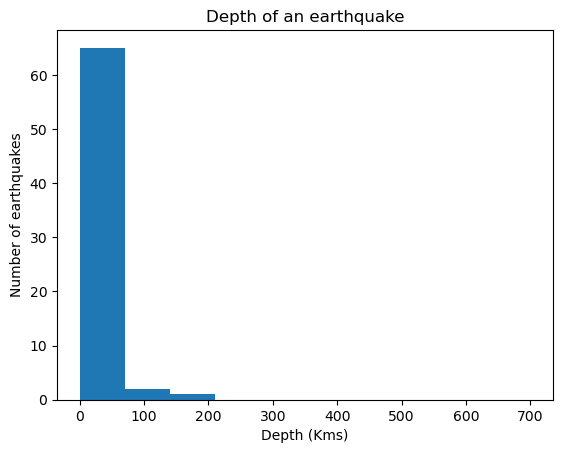

In [68]:
plt.hist(df['Depth'],bins = [x for x in range(0,701,70)])
plt.title('Depth of an earthquake')
plt.xlabel('Depth (Kms)')
plt.ylabel('Number of earthquakes')

**7. PLOTTING GEOSPATIAL DATA**

In [69]:
pip install keplergl

Defaulting to user installation because normal site-packages is not writeable
     ---------------------------------------- 9.7/9.7 MB 1.3 MB/s eta 0:00:00
  Installing build dependencies: started
  Installing build dependencies: still running...
  Installing build dependencies: still running...
  Installing build dependencies: still running...
  Installing build dependencies: still running...
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
     ---------------------------------------- 1.4/1.4 MB 221.4 kB/s eta 0:00:00
     ---------------------------------------- 1.1/1.1 MB 925.8 kB/s eta 0:00:00
     ----------------                         9.3/22.7 MB 12.0 kB/s eta 0:18:35
Note: you may need to restart the kernel to use updated packages.


ERROR: Exception:
Traceback (most recent call last):
  File "C:\ProgramData\anaconda3\lib\site-packages\pip\_vendor\urllib3\response.py", line 437, in _error_catcher
    yield
  File "C:\ProgramData\anaconda3\lib\site-packages\pip\_vendor\urllib3\response.py", line 560, in read
    data = self._fp_read(amt) if not fp_closed else b""
  File "C:\ProgramData\anaconda3\lib\site-packages\pip\_vendor\urllib3\response.py", line 526, in _fp_read
    return self._fp.read(amt) if amt is not None else self._fp.read()
  File "C:\ProgramData\anaconda3\lib\site-packages\pip\_vendor\cachecontrol\filewrapper.py", line 90, in read
    data = self.__fp.read(amt)
  File "C:\ProgramData\anaconda3\lib\http\client.py", line 465, in read
    s = self.fp.read(amt)
  File "C:\ProgramData\anaconda3\lib\socket.py", line 705, in readinto
    return self._sock.recv_into(b)
  File "C:\ProgramData\anaconda3\lib\ssl.py", line 1274, in recv_into
    return self.read(nbytes, buffer)
  File "C:\ProgramData\anaconda3\lib

In [ ]:
from google.colab import output
output.enable_custom_widget_manager()

In [ ]:
from keplergl import KeplerGl
map_1 = KeplerGl(height = 600)
map_1.add_data(data=df, name = 'Earthquakes Visualization')

User Guide: https://docs.kepler.gl/docs/keplergl-jupyter


In [ ]:
map_1

In [ ]:
# In order to save it to html, we need to change datatype back to string format
df['DateTime'] = df['DateTime'].astype(str)

In [ ]:
map_1.save_to_html(file_name= 'Heatmap_Earthquakes.html')